In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
df = pd.read_csv("London_houses.csv")
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [56]:
df.tail(10)

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13539,2019-04-01,england,245077,E92000001,59710.0,NaN,0
13540,2019-05-01,england,245255,E92000001,65387.0,NaN,0
13541,2019-06-01,england,246140,E92000001,66723.0,NaN,0
13542,2019-07-01,england,248562,E92000001,70681.0,NaN,0
13543,2019-08-01,england,249432,E92000001,75079.0,NaN,0
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0
13548,2020-01-01,england,247355,E92000001,NaN,NaN,0


In [57]:
df = df[df.date != "2020-01-01" ]
df.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13543,2019-08-01,england,249432,E92000001,75079.0,NaN,0
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [58]:
df.shape

(13504, 7)

In [59]:
## Checking for nan values
df.isnull().any()

date             False
area             False
average_price    False
code             False
houses_sold       True
no_of_crimes      True
borough_flag     False
dtype: bool

In [60]:
## Count the number of the nan
print(df["houses_sold"].isnull().sum())
print(df["no_of_crimes"].isnull().sum())

49
6097


In [61]:
## Fill the column no_of_crimes with the average value, and drop the rest of the nan rows
df["no_of_crimes"] = df["no_of_crimes"].fillna(df["no_of_crimes"].mean())
df.dropna(how="any", inplace=True)
print(df.shape)
print(df.isnull().any())

(13455, 7)
date             False
area             False
average_price    False
code             False
houses_sold      False
no_of_crimes     False
borough_flag     False
dtype: bool


In [62]:
## Examine some basic statistics methods
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.345500e+04,13455.000000,13455.000000,13455.000000
mean,2.622450e+05,3893.994129,2157.060750,0.733333
std,1.867722e+05,12114.402476,666.938132,0.442233
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.320400e+05,247.000000,2052.000000,0.000000
50%,2.222950e+05,371.000000,2157.462400,1.000000
75%,3.338770e+05,3146.000000,2207.000000,1.000000
max,1.463378e+06,132163.000000,7227.000000,1.000000


In [63]:
## Creating some new columns that can help in the data exploratory analysis
df["Year"] = df["date"].apply(lambda x: x.split("-")[0])
df["Month"] = df["date"].apply(lambda x: x.split("-")[1])
df["Post_code"] = df["code"].str[1:]
df.drop(columns=["date","code"], inplace=True)


In [64]:
## Convert the variables types
df["Year"] = df.Year.astype(str).astype(int)
df["Month"] = df.Month.astype(str).astype(int)
df["Post_code"] = df["Post_code"].astype(str).astype(int)
df.dtypes

area              object
average_price      int64
houses_sold      float64
no_of_crimes     float64
borough_flag       int64
Year               int32
Month              int32
Post_code          int32
dtype: object

In [65]:
df.head()

,area,average_price,houses_sold,no_of_crimes,borough_flag,Year,Month,Post_code
0,city of london,91449,17.0,2157.4624,1,1995,1,9000001
1,city of london,82203,7.0,2157.4624,1,1995,2,9000001
2,city of london,79121,14.0,2157.4624,1,1995,3,9000001
3,city of london,77101,7.0,2157.4624,1,1995,4,9000001
4,city of london,84409,10.0,2157.4624,1,1995,5,9000001


C:\Users\nikos\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


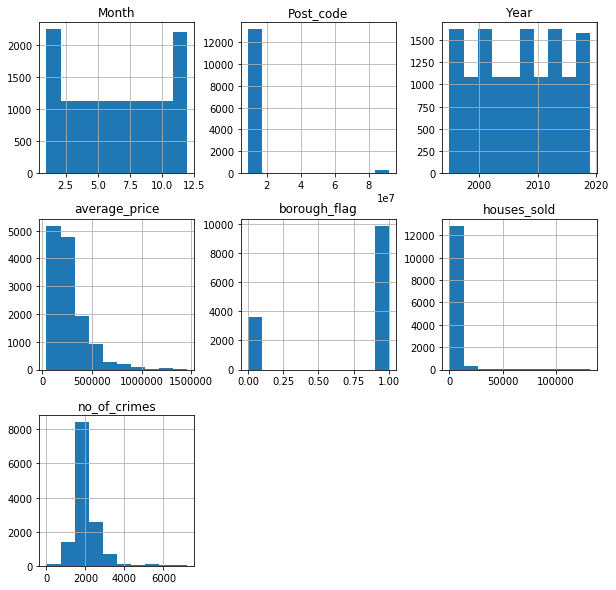

In [66]:
## Visualize basic charts to examine the distribution of the features 

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [67]:
## The distribution of the sold houses over the years 
sold_house = df.groupby("Year").sum()

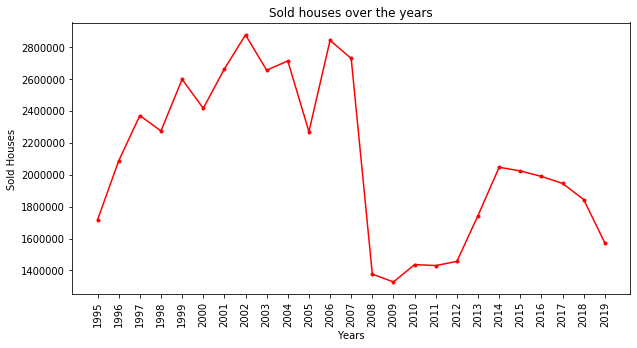

In [68]:
x = [i for i, df in df.groupby("Year")]

plt.figure(figsize=(10,5))

plt.title("Sold houses over the years")

plt.plot(x,sold_house["houses_sold"], "r.-")
plt.xlabel('Years')

plt.ylabel('Sold Houses')
plt.xticks(x, rotation="90")
plt.show()

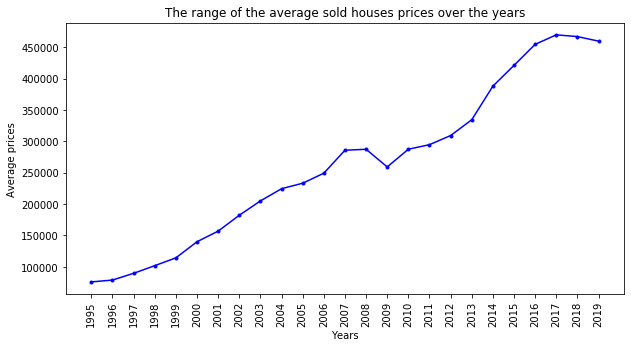

In [69]:
## The distribution of the average prices and the total gross sales revenue over the years
average_price = df.groupby("Year").mean()
gross_sales = df.groupby("Year").sum()

plt.figure(figsize=(10,5))

plt.title("The range of the average sold houses prices over the years")


plt.plot(x,average_price["average_price"], "b.-")


plt.xlabel('Years')
plt.ylabel('Average prices')

plt.xticks(x, rotation="90")
plt.show()

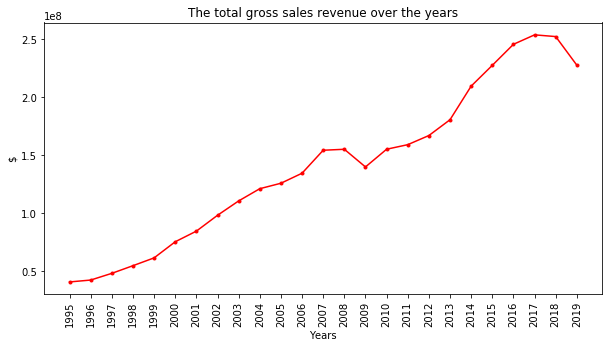

In [70]:
## The gross sales revenue over the years
plt.figure(figsize=(10,5))

plt.title("The total gross sales revenue over the years")

plt.plot(x,gross_sales["average_price"], "r.-")


plt.xlabel('Years')
plt.ylabel('$')

plt.xticks(x, rotation="90")
plt.show()

In [71]:
## Wich was the month with the most sold houses
month = df.groupby("Month").sum()
month

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Post_code
Month,,,,,,
1,286609403,3336658.0,2.416759e+06,825,2257875.0,1.307502e+10
2,287393985,3423604.0,2.320616e+06,825,2257875.0,1.307502e+10
3,288157517,4254574.0,2.455650e+06,825,2257875.0,1.307502e+10
4,290043899,3987560.0,2.401138e+06,825,2257875.0,1.307502e+10
5,292356798,4402064.0,2.474829e+06,825,2257875.0,1.307502e+10
6,295186446,4790590.0,2.453814e+06,825,2257875.0,1.307502e+10
7,298558655,5006940.0,2.491819e+06,825,2257875.0,1.307502e+10
8,301026819,5006415.0,2.421024e+06,825,2257875.0,1.307502e+10
9,302795436,4539468.0,2.399383e+06,825,2257875.0,1.307502e+10


In [72]:
mon = [i for i, df in  df.groupby("Month")]

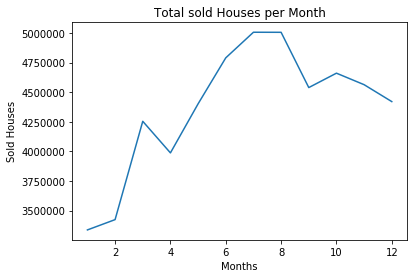

In [73]:
# The month with the nost sold houses

plt.plot(mon, month["houses_sold"])
plt.title("Total sold Houses per Month")

plt.xlabel("Months")
plt.ylabel("Sold Houses")
plt.show()

In [74]:
mean_price = df.groupby("Month").mean()
mean_price

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Post_code
Month,,,,,,
1,254763.913778,2965.918222,2148.230611,0.733333,2007.0,1.162224e+07
2,255461.320000,3043.203556,2062.770166,0.733333,2007.0,1.162224e+07
3,256140.015111,3781.843556,2182.800388,0.733333,2007.0,1.162224e+07
4,257816.799111,3544.497778,2134.344799,0.733333,2007.0,1.162224e+07
5,259872.709333,3912.945778,2199.847911,0.733333,2007.0,1.162224e+07
6,262387.952000,4258.302222,2181.167911,0.733333,2007.0,1.162224e+07
7,265385.471111,4450.613333,2214.950133,0.733333,2007.0,1.162224e+07
8,267579.394667,4450.146667,2152.021244,0.733333,2007.0,1.162224e+07
9,269151.498667,4035.082667,2132.784799,0.733333,2007.0,1.162224e+07


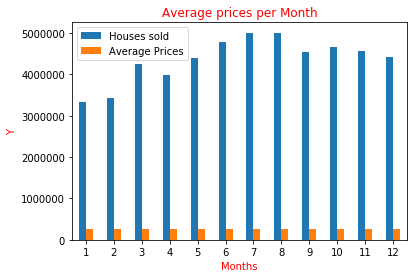

In [75]:
# the total of the houses that sold per month and the mean price that they sold
df2 = pd.DataFrame({'Houses sold': month["houses_sold"],
                   'Average Prices': mean_price["average_price"]}, index=mon)
ax = df2.plot.bar(rot=0)

plt.title("Average prices per Month", color="r")

plt.ylabel("Y", color="r")
plt.xlabel("Months", color="r")

plt.show()

In [23]:
## Examine the data by area
area = df.groupby("area").mean()
area.head()

,average_price,houses_sold,no_of_crimes,borough_flag,Year,Month,Post_code
area,,,,,,,
barking and dagenham,158905.882943,198.989967,1733.218371,1.0,2006.959866,6.481605,9000002.0
barnet,303557.357860,446.983278,2247.077902,1.0,2006.959866,6.481605,9000003.0
bexley,188602.464883,325.588629,1504.686598,1.0,2006.959866,6.481605,9000004.0
brent,269290.632107,272.953177,2353.111347,1.0,2006.959866,6.481605,9000005.0
bromley,252917.053512,496.709030,2052.582919,1.0,2006.959866,6.481605,9000006.0


In [24]:
district = [i for i, df in df.groupby("area")]
UpCases  = [elem.upper() for elem in district]

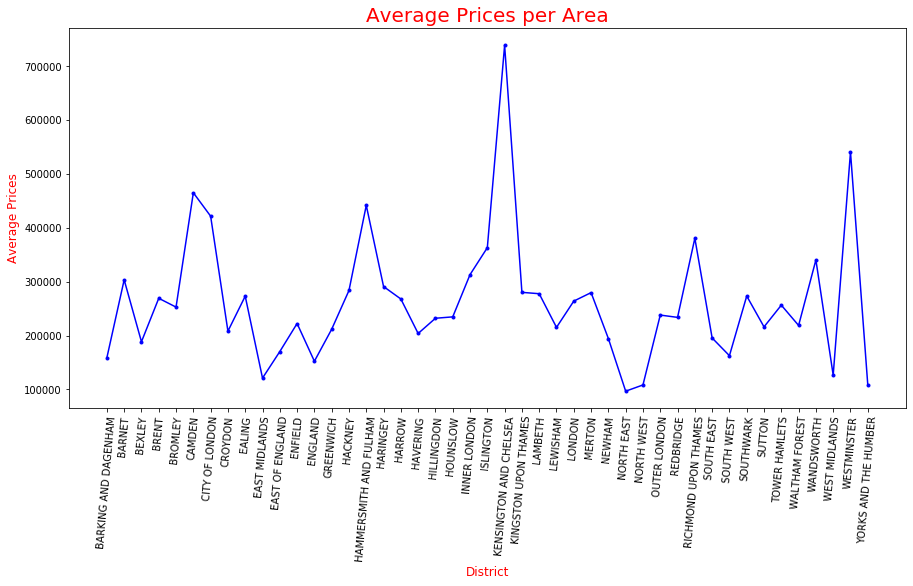

In [25]:

plt.figure(figsize=(15,7))

plt.plot(UpCases, area["average_price"], "b.-")
plt.title("Average Prices per Area", color="r", size=20)


plt.xlabel("District", color="r", size=12)
plt.ylabel("Average Prices", color="r", size=12)

plt.xticks(UpCases, rotation="85", size=10)


plt.show()

In [76]:
## Lets examine how the crisis efect every area in London 
pd.set_option('display.max_rows', None)

df_pivot = pd.pivot_table(df,index=["area","Year"],values=["houses_sold", "average_price"])
df_pivot

average_price    houses_sold
area                   Year                              
barking and dagenham   1995   5.181800e+04     123.000000
                       1996   5.171825e+04     156.750000
                       1997   5.597425e+04     202.833333
                       1998   6.028575e+04     208.000000
                       1999   6.532083e+04     223.833333
                       2000   7.754950e+04     234.416667
                       2001   8.866400e+04     266.916667
                       2002   1.122219e+05     287.416667
                       2003   1.424990e+05     301.250000
                       2004   1.581760e+05     301.333333
                       2005   1.633609e+05     240.833333
                       2006   1.678532e+05     304.500000
                       2007   1.849097e+05     332.083333
                       2008   1.873568e+05     140.666667
                       2009   1.564469e+05     105.166667
                       2010   1.665608e+05     121.083333
                       2011   1.634651e+05     121.500000
                       2012   1.658639e+05     111.833333
                       2013   1.737337e+05     149.000000
                       2014   2.011722e+05     188.250000
                       2015   2.334601e+05     200.416667
                       2016   2.739198e+05     183.583333
                       2017   2.877348e+05     172.500000
                       2018   2.951967e+05     161.083333
                       2019   2.990649e+05     130.818182
barnet                 1995   9.179250e+04     390.750000
                       1996   9.400042e+04     512.583333
                       1997   1.068832e+05     557.333333
                       1998   1.223592e+05     530.750000
                       1999   1.360044e+05     623.916667
                       2000   1.679527e+05     543.750000
                       2001   1.855633e+05     566.916667
                       2002   2.207462e+05     609.583333
                       2003   2.512128e+05     517.333333
                       2004   2.718541e+05     557.583333
                       2005   2.794597e+05     448.333333
                       2006   2.913378e+05     562.666667
                       2007   3.269154e+05     571.750000
                       2008   3.300233e+05     286.500000
                       2009   2.991030e+05     264.166667
                       2010   3.331281e+05     345.250000
                       2011   3.389780e+05     325.666667
                       2012   3.586274e+05     337.916667
                       2013   3.747706e+05     397.583333
                       2014   4.303633e+05     421.500000
                       2015   4.786881e+05     427.083333
                       2016   5.259395e+05     424.916667
                       2017   5.382809e+05     335.666667
                       2018   5.332664e+05     325.916667
                       2019   5.196950e+05     274.818182
bexley                 1995   6.429158e+04     284.333333
                       1996   6.549050e+04     329.583333
                       1997   7.078950e+04     392.166667
                       1998   8.063200e+04     356.083333
                       1999   8.677767e+04     421.666667
                       2000   1.031865e+05     364.083333
                       2001   1.165271e+05     439.166667
                       2002   1.367980e+05     478.166667
                       2003   1.644821e+05     432.833333
                       2004   1.791412e+05     422.166667
                       2005   1.865120e+05     337.916667
                       2006   1.918312e+05     416.500000
                       2007   2.080859e+05     417.000000
                       2008   2.101991e+05     207.250000
                       2009   1.890508e+05     181.083333
                       2010   2.008741e+05     205.833333
                       2011   2.006721e+05     212.083333
                       2012

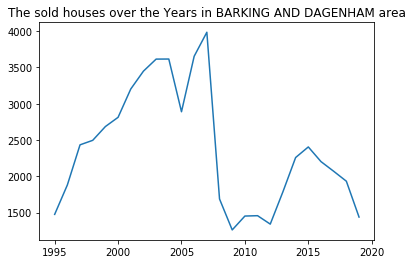

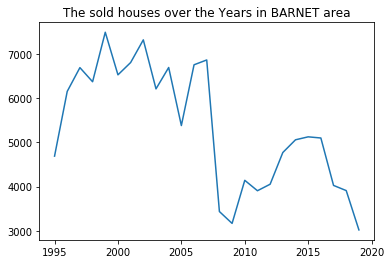

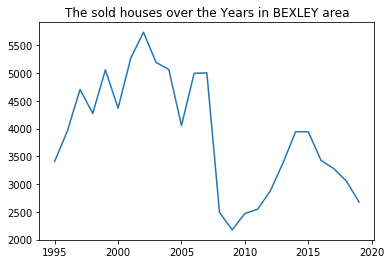

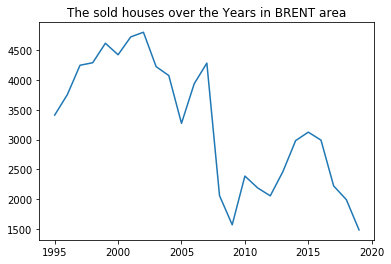

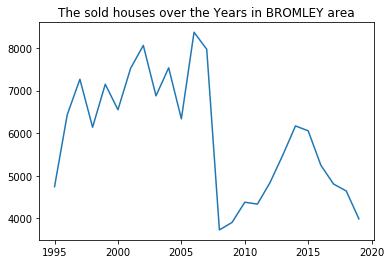

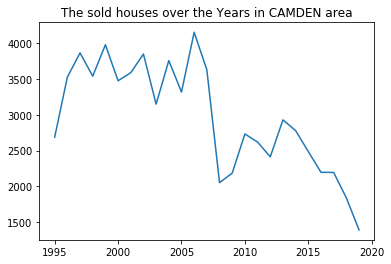

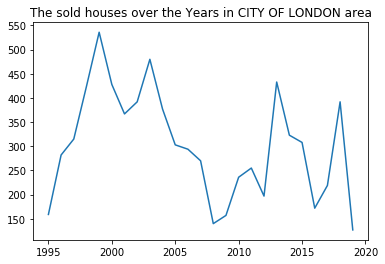

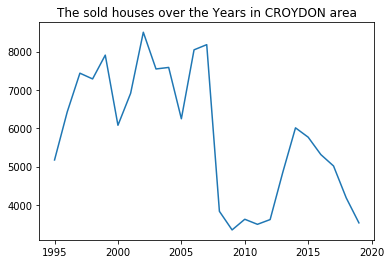

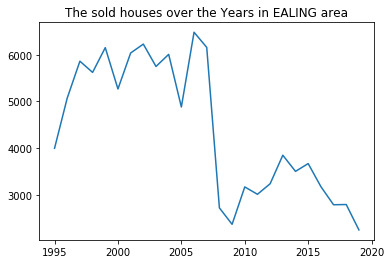

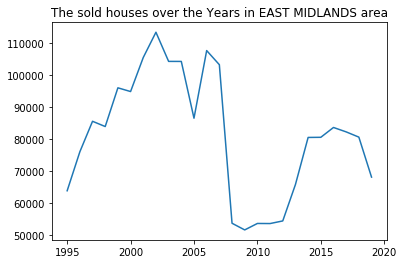

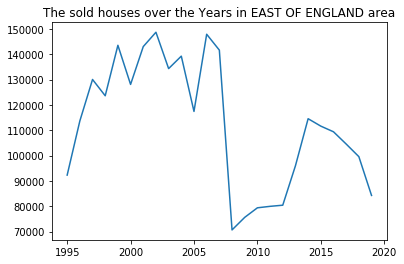

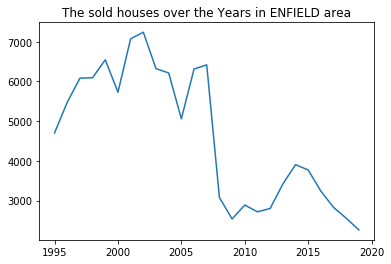

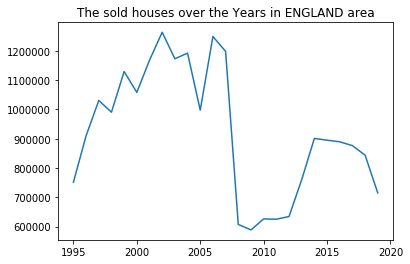

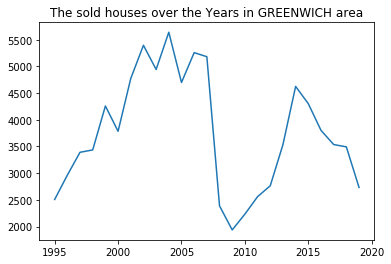

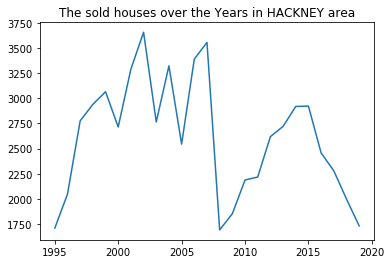

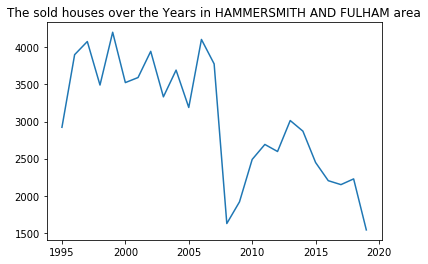

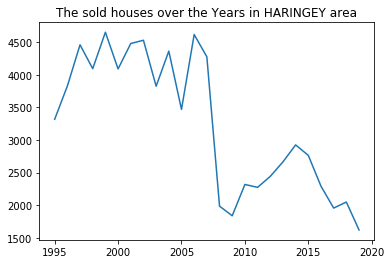

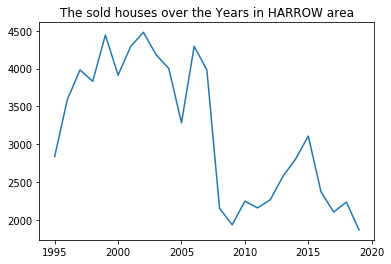

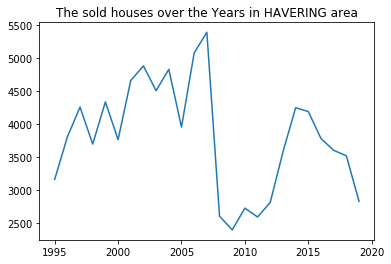

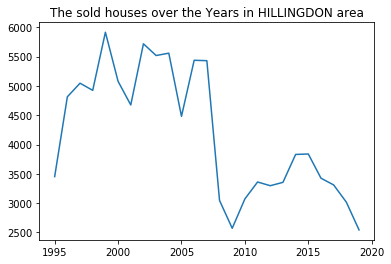

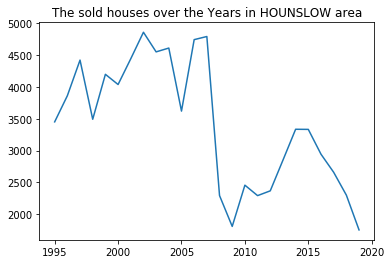

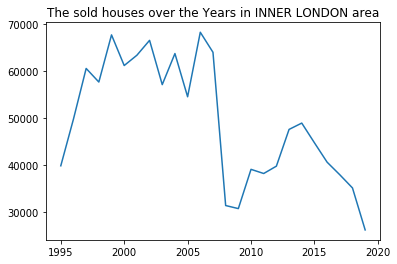

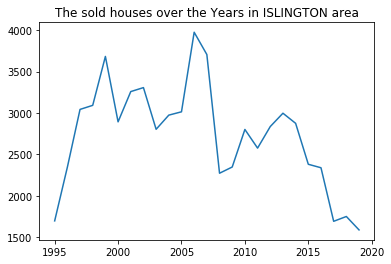

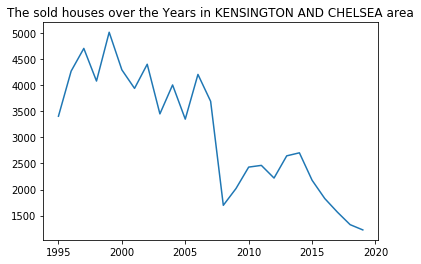

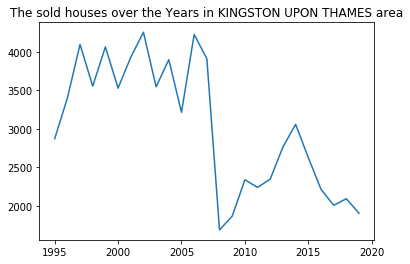

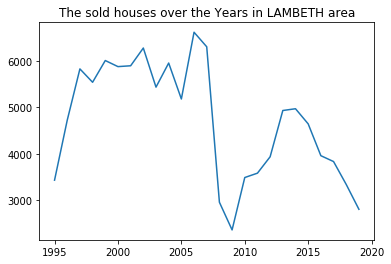

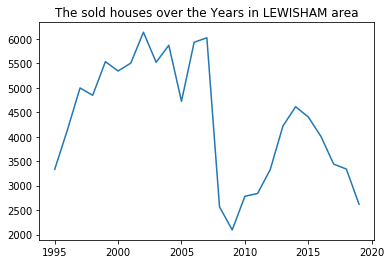

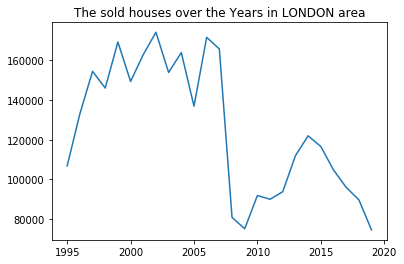

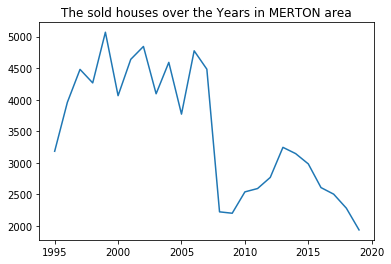

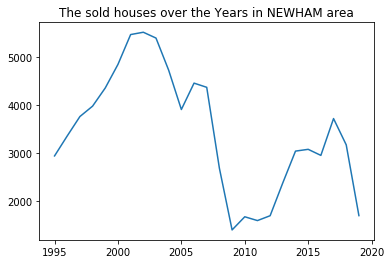

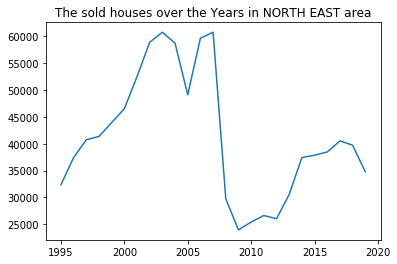

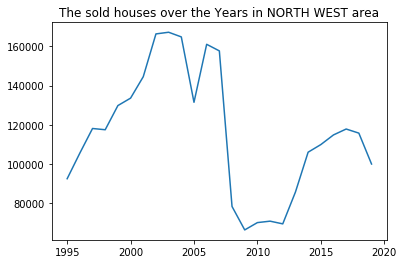

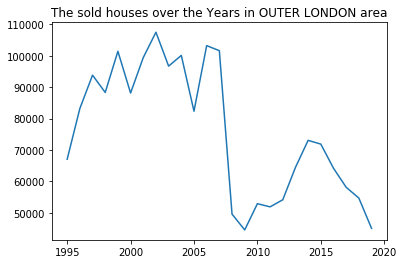

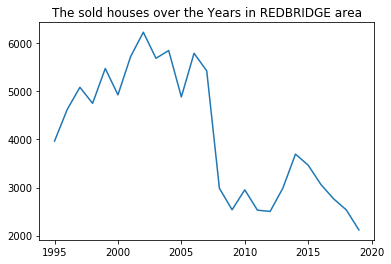

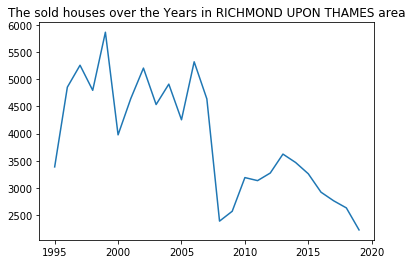

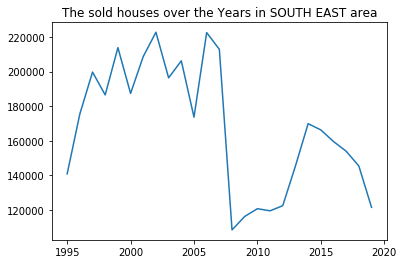

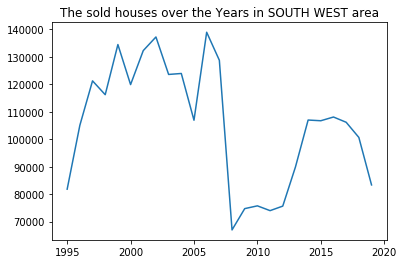

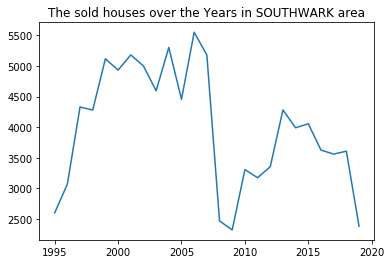

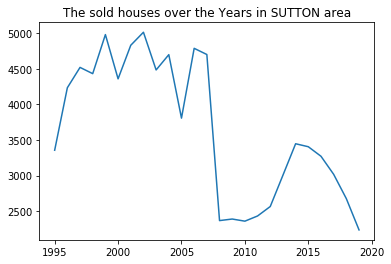

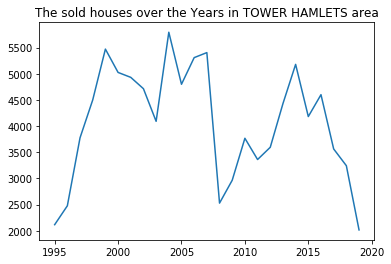

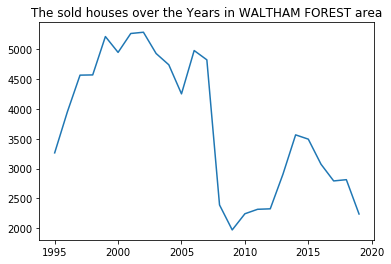

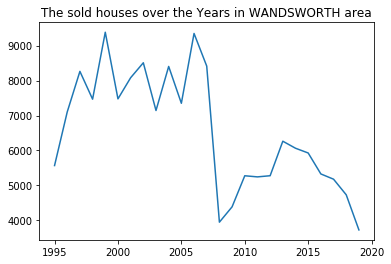

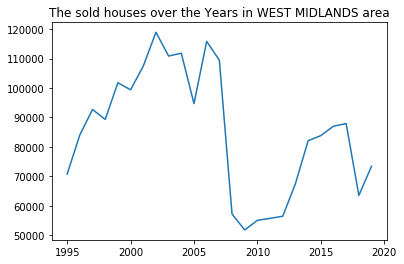

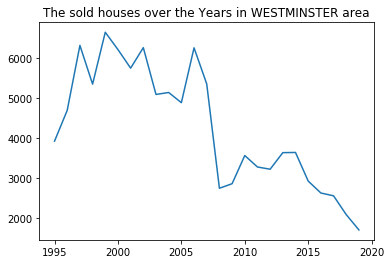

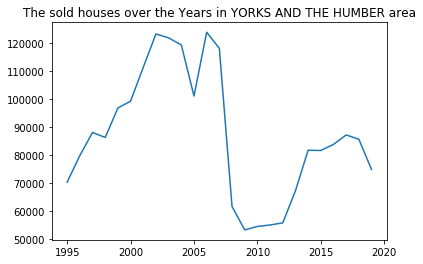

In [27]:
x = [i for i, df in df.groupby("area")]
for j in x:
    city = df[df["area"] == j].groupby("Year").sum()
    plt.title("The sold houses over the Years in "+ j.upper() + " area")
    c = [i for i, df in df[df["area"] == "city of london"].groupby("Year")]
    plt.plot(c, city["houses_sold"])
    plt.show()

In [35]:
df[500:600]

,Year,Post_code,average_price,houses_sold,no_of_crimes
502,2011,9000002,167493,141.0,1430.0000
503,2011,9000002,164847,124.0,1518.0000
504,2011,9000002,162631,111.0,1444.0000
505,2012,9000002,163899,81.0,1538.0000
506,2012,9000002,163607,122.0,1402.0000
507,2012,9000002,164438,162.0,1683.0000
508,2012,9000002,164731,68.0,1363.0000
509,2012,9000002,166503,101.0,1500.0000
510,2012,9000002,168049,127.0,1412.0000
511,2012,9000002,168007,134.0,1450.0000


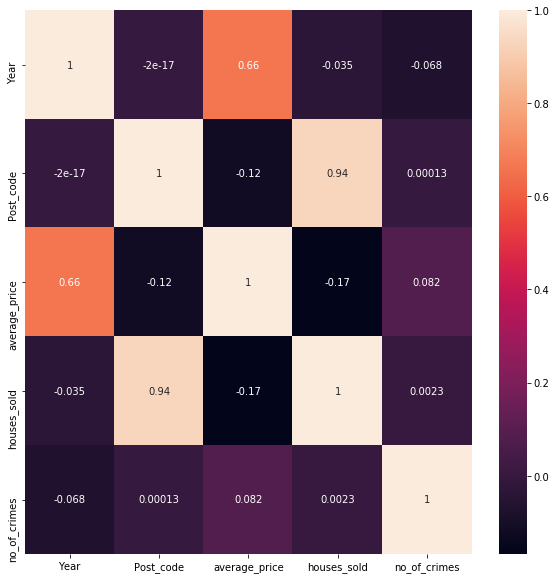

In [29]:
## At the end lets check the correlation of our data features
# How the prices and the total sold houses affected by the number of the crimes, Year, post code

import seaborn as sn
df = df[["Year","Post_code","average_price", "houses_sold", "no_of_crimes"]]
plt.figure(figsize = (10,10))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

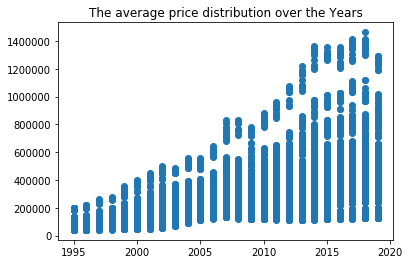

In [44]:
## The features Year and post code directly affect the sold houses and the prices
# Lets present a scatter plot of the average prices distribution over the years 
plt.title("The average price distribution over the Years")
plt.scatter(df["Year"], df["average_price"])
plt.show()